## Problema materias del semestre

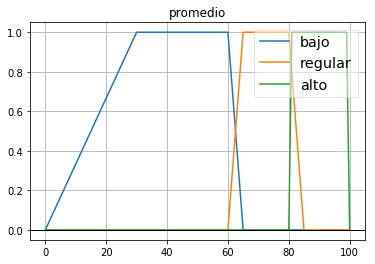

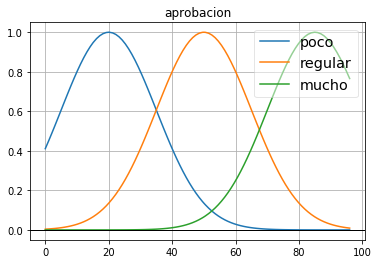

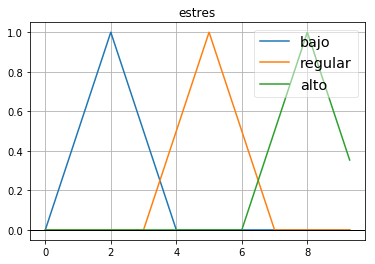

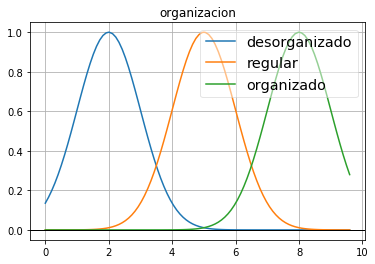

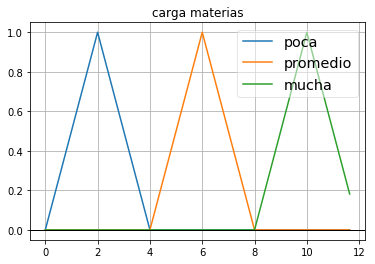

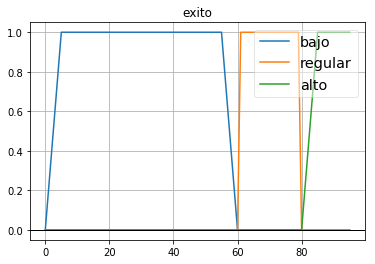

In [5]:
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#INPUTS

# 1- Promedio general (Calificación)
promedio_bajo = FuzzySet('bajo', Trapmf([0,30,60,65]))
promedio_regular = FuzzySet('regular', Trapmf([60,65,80,85]))
promedio_alto = FuzzySet('alto', Trapmf([80,81,99,100]))
promedio = FuzzyVariable('promedio',[promedio_bajo,promedio_regular,promedio_alto],universe=[0,101])
promedio.show()

# 2 Porcentaje promedio de la aprobación de alumnos de las materias a tomar (Porcentaje)
aprobacion_poco = FuzzySet('poco', Gaussmf([15,20]))
aprobacion_regular = FuzzySet('regular', Gaussmf([15, 50]))
aprobacion_mucho = FuzzySet('mucho', Gaussmf([15, 85]))
aprobacion = FuzzyVariable('aprobacion',[aprobacion_poco, aprobacion_regular,aprobacion_mucho], universe=[0, 100])
aprobacion.show()

# 3 Nivel de estres (Escala 0-10)
estres_bajo = FuzzySet('bajo',Trimf([0,2,4]))
estres_regular = FuzzySet('regular', Trimf([3,5,7]))
estres_alto = FuzzySet('alto', Trimf([6,8,10]))
estres = FuzzyVariable('estres',[estres_bajo,estres_regular,estres_alto], universe=[0, 10])
estres.show()

# 4 Habilidad organización de tiempo (Escala 0-10)
organizacion_desorganizado = FuzzySet('desorganizado', Gaussmf([1,2]))
organizacion_regular = FuzzySet('regular', Gaussmf([1, 5]))
organizacion_organizado = FuzzySet('organizado', Gaussmf([1,8]))
organizacion = FuzzyVariable('organizacion',[organizacion_desorganizado,organizacion_regular,organizacion_organizado], universe=[0,10])
organizacion.show()

# 5 Carga de materias  (Porcentaje)
carga_poca = FuzzySet('poca', Trimf([0,2,4]))
carga_promedio = FuzzySet('promedio', Trimf([4,6,8]))
carga_mucha = FuzzySet('mucha', Trimf([8,10,12]))
carga = FuzzyVariable('carga materias', [carga_poca, carga_promedio,carga_mucha], universe=[0, 12])
carga.show()


#OUTPUT

# 1 Nivel de exito (Porcentaje)
exito_bajo = FuzzySet('bajo',Trapmf([0,5,55,60]))
exito_regular = FuzzySet('regular',Trapmf([60,61,79,80]))
exito_alto = FuzzySet('alto', Trapmf([80,85,95,100]))
exito = FuzzyVariable('exito',[exito_bajo, exito_regular,exito_alto], universe=[0, 100])
exito.show()


#RULES
ant1  = Antecedent(promedio['bajo'], conector=min)
ant1.add(aprobacion['poco'])
ant1.add(estres['alto'])
ant1.add(organizacion['desorganizado'])
ant1.add(carga['mucha'])
cont1 = Consequent(exito['bajo'])
rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(promedio['bajo'], conector=min)
ant2.add(aprobacion['mucho'])
ant2.add(estres['regular'])
ant2.add(organizacion['regular'])
ant2.add(carga['promedio'])
cont2 = Consequent(exito['regular'])
rule2 = FuzzyRule(ant2, cont2)

ant3  = Antecedent(promedio['regular'], conector=min)
ant3.add(aprobacion['regular'])
ant3.add(estres['regular'])
ant3.add(organizacion['regular'])
ant3.add(carga['promedio'])
cont3 = Consequent(exito['regular'])
rule3 = FuzzyRule(ant3, cont3)

ant4  = Antecedent(promedio['regular'], conector=min)
ant4.add(aprobacion['mucho'])
ant4.add(estres['bajo'])
ant4.add(organizacion['organizado'])
ant4.add(carga['mucha'])
cont4 = Consequent(exito['regular'])
rule4 = FuzzyRule(ant4, cont4)

ant5  = Antecedent(promedio['alto'], conector=min)
ant5.add(aprobacion['poco'])
ant5.add(estres['alto'])
ant5.add(organizacion['organizado'])
ant5.add(carga['promedio'])
cont5 = Consequent(exito['regular'])
rule5 = FuzzyRule(ant5, cont5)

ant6  = Antecedent(promedio['alto'], conector=min)
ant6.add(aprobacion['regular'])
ant6.add(estres['regular'])
ant6.add(organizacion['regular'])
ant6.add(carga['mucha'])
cont6 = Consequent(exito['alto'])
rule6 = FuzzyRule(ant6, cont6)

# #Building the FIS

fis = FuzzyInferenceSystem([rule1,rule2,rule3,rule4,rule5,rule6], and_op='prod', or_op='sum')                



Evaluation of FIS with inputs:
promedio: 95
aprobacion: 60
estres: 10
organizacion: 8
carga: 8
	IF promedio is bajo and aprobacion is poco and estres is alto and organizacion is desorganizado and carga materias is mucha THEN exito is bajo = 0 with weight = 1
	IF promedio is bajo and aprobacion is mucho and estres is regular and organizacion is regular and carga materias is promedio THEN exito is regular = 0 with weight = 1
	IF promedio is regular and aprobacion is regular and estres is regular and organizacion is regular and carga materias is promedio THEN exito is regular = 0 with weight = 1
	IF promedio is regular and aprobacion is mucho and estres is bajo and organizacion is organizado and carga materias is mucha THEN exito is regular = 0 with weight = 1
	IF promedio is alto and aprobacion is poco and estres is alto and organizacion is organizado and carga materias is promedio THEN exito is regular = 0.0 with weight = 1
	IF promedio is alto and aprobacion is regular and estres is r

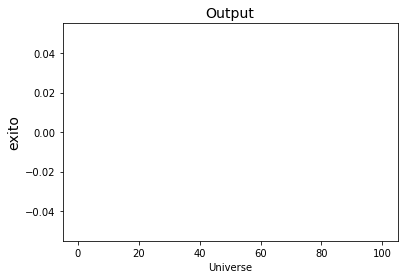

{'exito': array(0.)}

In [4]:
#FIS Evaluation

inputs = {'promedio':95, 'aprobacion':60,'estres':10, 'organizacion':8,'carga':8}
result = fis.eval(inputs)
result.show()

#result(Centroid)
Centroid(result).eval()


Evaluation of FIS with inputs:
peso: 6
tipoRopa: 5
suciedad: 65
	IF peso is liviano and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is corto and intensidad is suave and temperatura is frio and detergente is poco and tiempo enjuague is corto and tiempo exprimido is corto = 0.0 with weight = 1
	IF peso is liviano and tipo ropa is sintetica and suciedad is alto THEN tiempo lavado is regular and intensidad is normal and temperatura is tibio and detergente is mucho and tiempo enjuague is largo and tiempo exprimido is largo = 0.0 with weight = 1
	IF peso is regular and tipo ropa is algodon and suciedad is regular THEN tiempo lavado is regular and intensidad is normal and temperatura is promedio and detergente is regular and tiempo enjuague is regular and tiempo exprimido is regular = 0.6065306597126334 with weight = 1
	IF peso is regular and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is regular and intensidad is suave and temperatura is frio and detergen

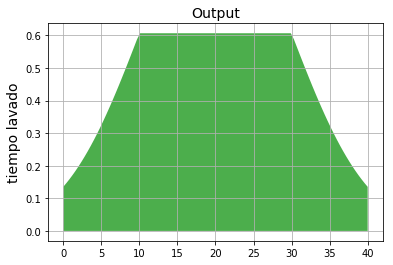

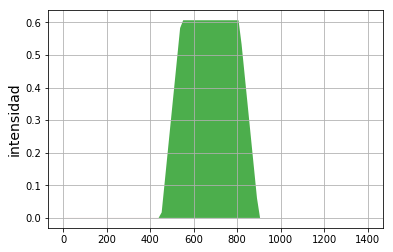

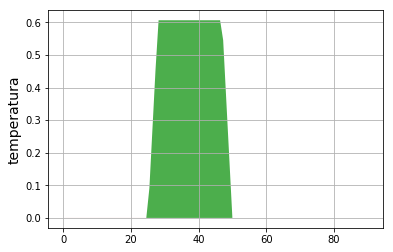

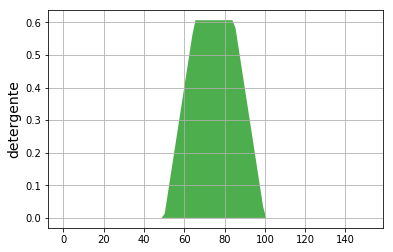

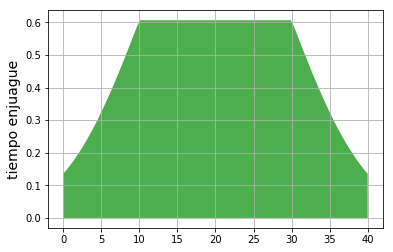

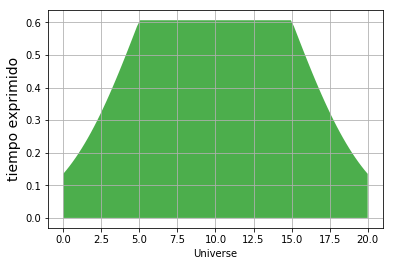

{'tiempo lavado': array(20.),
 'intensidad': array(674.98654301),
 'temperatura': array(37.47204952),
 'detergente': array(75.00340778),
 'tiempo enjuague': array(20.),
 'tiempo exprimido': array(10.)}

In [39]:
#FIS Evaluation

inputs2 = {'peso':6, 'tipoRopa':5,'suciedad':65}
result2 = fis.eval(inputs2)
result2.show()

#result(Centroid)
Centroid(result2).eval()


Evaluation of FIS with inputs:
peso: 9
tipoRopa: 8
suciedad: 80
	IF peso is liviano and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is corto and intensidad is suave and temperatura is frio and detergente is poco and tiempo enjuague is corto and tiempo exprimido is corto = 0.0 with weight = 1
	IF peso is liviano and tipo ropa is sintetica and suciedad is alto THEN tiempo lavado is regular and intensidad is normal and temperatura is tibio and detergente is mucho and tiempo enjuague is largo and tiempo exprimido is largo = 0.0 with weight = 1
	IF peso is regular and tipo ropa is algodon and suciedad is regular THEN tiempo lavado is regular and intensidad is normal and temperatura is promedio and detergente is regular and tiempo enjuague is regular and tiempo exprimido is regular = 0.0 with weight = 1
	IF peso is regular and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is regular and intensidad is suave and temperatura is frio and detergente is regular a

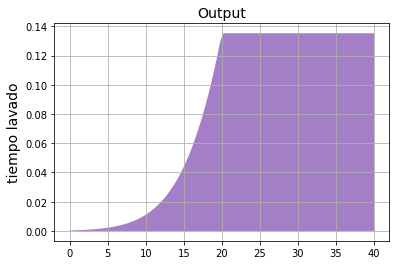

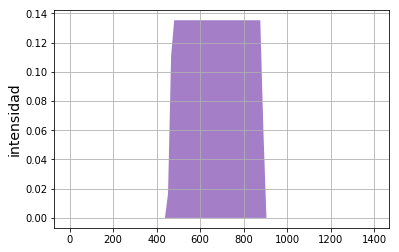

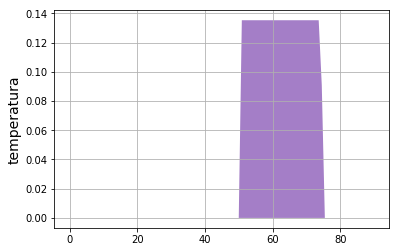

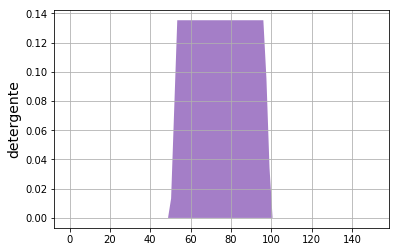

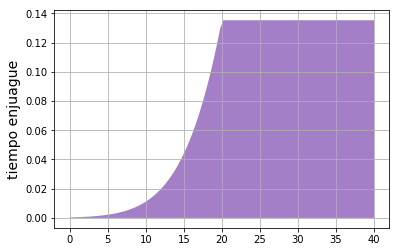

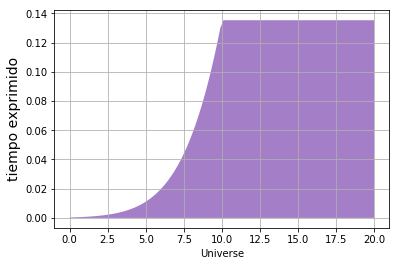

{'tiempo lavado': array(27.72046531),
 'intensidad': array(675.25727939),
 'temperatura': array(62.58181811),
 'detergente': array(74.97720806),
 'tiempo enjuague': array(27.72046531),
 'tiempo exprimido': array(13.86023265)}

In [38]:
#FIS Evaluation
inputs3 = {'peso':9, 'tipoRopa':8,'suciedad':80}
result3 = fis.eval(inputs3)

result3.show()

#result(Centroid)
Centroid(result3).eval()

In [83]:
from FuzzySystem.Defuzzifier import  CenterOfSets, FirstOfMaximum, LastOfMaximum, LastOfMaximum, ModifiedHeights, Heights, MeanOfMaximum

Defuzzification_methods = [Centroid,CenterOfSets,  Heights, ModifiedHeights, MeanOfMaximum, LastOfMaximum, FirstOfMaximum]

for dm in Defuzzification_methods:
    print(dm.name)
    print("{:>5}\n".format(str(dm(result).eval())))

Centroid
{'tiempo lavado': array(8.27053708), 'intensidad': array(225.08912529), 'temperatura': array(12.52163056), 'detergente': array(25.00704838), 'tiempo enjuague': array(4.07913669), 'tiempo exprimido': array(4.13526854)}

Center of Sets
{'tiempo lavado': array(8.27053708), 'intensidad': array(225.08912529), 'temperatura': array(12.52163056), 'detergente': array(25.00704838), 'tiempo enjuague': array(4.07913669), 'tiempo exprimido': array(4.13526854)}

Heights
{'tiempo lavado': array(3.23232323), 'intensidad': array(40.), 'temperatura': array(12.32323232), 'detergente': array(25.05050505), 'tiempo enjuague': array(1.61616162), 'tiempo exprimido': array(1.61616162)}

Modified Heights
{'tiempo lavado': array(3.23232323), 'intensidad': array(40.), 'temperatura': array(12.32323232), 'detergente': array(25.05050505), 'tiempo enjuague': array(1.61616162), 'tiempo exprimido': array(1.61616162)}

Mean Of Maximum
{'tiempo lavado': 3.2323232323232323, 'intensidad': 226.26262626262627, 'temp

# Non-singleton Input

In [43]:
from FuzzySystem.NonSingleton import NonSingleton
import numpy as np

In [44]:
nsinp1_values = np.linspace(0,10,50)
nsinp1 = NonSingleton(Gaussmf([2,5]), nsinp1_values)

nsinp2_values = np.linspace(0,10,50)
nsinp2 = NonSingleton(Gaussmf([2,5]), nsinp2_values)

nsinp3_values = np.linspace(0,10,50)
nsinp3 = NonSingleton(Gaussmf([2,5]), nsinp3_values)

nsinputs = {'peso':nsinp1, 'tipoRopa':nsinp2, 'suciedad':nsinp3}

result = fis.eval(nsinputs)


Evaluation of FIS with inputs:
peso: Non-singleton class: Gaussmf params: [2, 5]  Range [0.0 - 10.0]  Values 50
tipoRopa: Non-singleton class: Gaussmf params: [2, 5]  Range [0.0 - 10.0]  Values 50
suciedad: Non-singleton class: Gaussmf params: [2, 5]  Range [0.0 - 10.0]  Values 50
	IF peso is liviano and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is corto and intensidad is suave and temperatura is frio and detergente is poco and tiempo enjuague is corto and tiempo exprimido is corto = 0.5714285714285714 with weight = 1
	IF peso is liviano and tipo ropa is sintetica and suciedad is alto THEN tiempo lavado is regular and intensidad is normal and temperatura is tibio and detergente is mucho and tiempo enjuague is largo and tiempo exprimido is largo = 1.522997974471263e-08 with weight = 1
	IF peso is regular and tipo ropa is algodon and suciedad is regular THEN tiempo lavado is regular and intensidad is normal and temperatura is promedio and detergente is regular and ti

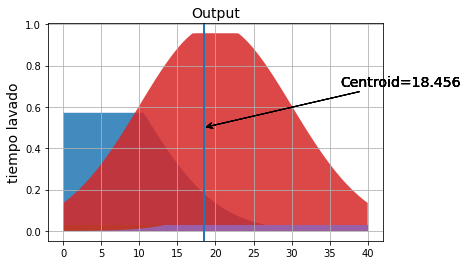

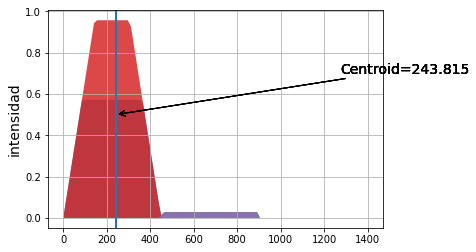

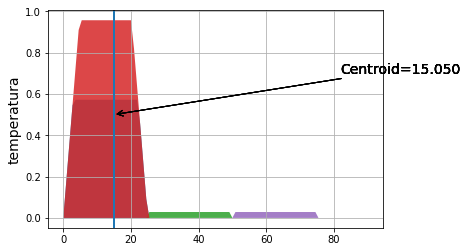

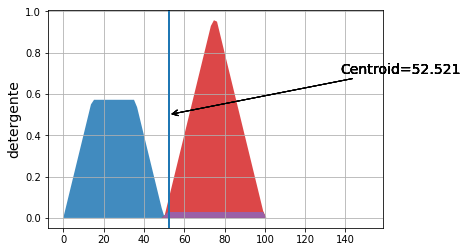

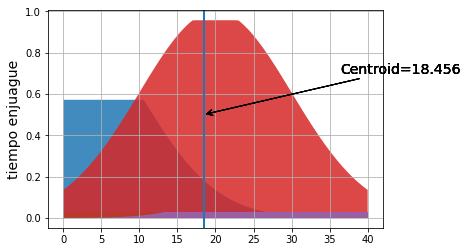

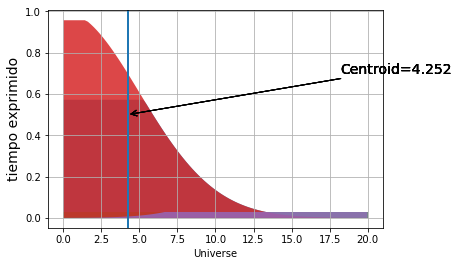

In [45]:
result.show(Centroid)

In [46]:
fis.matrix_rules

[[('peso', 'liviano'),
  ('tipo ropa', 'delicada'),
  ('suciedad', 'bajo'),
  ('tiempo lavado', 'corto'),
  ('intensidad', 'suave'),
  ('temperatura', 'frio'),
  ('detergente', 'poco'),
  ('tiempo enjuague', 'corto'),
  ('tiempo exprimido', 'corto'),
  ('weight', 1)],
 [('peso', 'liviano'),
  ('tipo ropa', 'sintetica'),
  ('suciedad', 'alto'),
  ('tiempo lavado', 'regular'),
  ('intensidad', 'normal'),
  ('temperatura', 'tibio'),
  ('detergente', 'mucho'),
  ('tiempo enjuague', 'largo'),
  ('tiempo exprimido', 'largo'),
  ('weight', 1)],
 [('peso', 'regular'),
  ('tipo ropa', 'algodon'),
  ('suciedad', 'regular'),
  ('tiempo lavado', 'regular'),
  ('intensidad', 'normal'),
  ('temperatura', 'promedio'),
  ('detergente', 'regular'),
  ('tiempo enjuague', 'regular'),
  ('tiempo exprimido', 'regular'),
  ('weight', 1)],
 [('peso', 'regular'),
  ('tipo ropa', 'delicada'),
  ('suciedad', 'bajo'),
  ('tiempo lavado', 'regular'),
  ('intensidad', 'suave'),
  ('temperatura', 'frio'),
  ('deter